In [1]:
import pandas as pd
import numpy as np
import os 

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# 读取数据
data_folder = os.walk(r"data")  
for path,dir_list,file_list in data_folder:  
    for file_name in file_list:  
        path_now = os.path.join(path, file_name)
        if file_name == "beijing_all_20150101.csv" :
            data_all = pd.read_csv(path_now)
            print(path_now)
#         elif file_name == "beijing_all_20161229.csv" :
#             data_now = pd.read_csv(path_now)
#             data_all = pd.concat([data_all, data_now], axis=0)
#             break
        elif file_name[:11] == "beijing_all" :
            data_now = pd.read_csv(path_now)
            data_all = pd.concat([data_all, data_now], axis=0)
            print(path_now)

data/beijing_20150101-20151231/beijing_all_20150101.csv
data/beijing_20150101-20151231/beijing_all_20150102.csv
data/beijing_20150101-20151231/beijing_all_20150103.csv
data/beijing_20150101-20151231/beijing_all_20150104.csv
data/beijing_20150101-20151231/beijing_all_20150105.csv
data/beijing_20150101-20151231/beijing_all_20150106.csv
data/beijing_20150101-20151231/beijing_all_20150107.csv
data/beijing_20150101-20151231/beijing_all_20150108.csv
data/beijing_20150101-20151231/beijing_all_20150109.csv
data/beijing_20150101-20151231/beijing_all_20150110.csv
data/beijing_20150101-20151231/beijing_all_20150111.csv
data/beijing_20150101-20151231/beijing_all_20150112.csv
data/beijing_20150101-20151231/beijing_all_20150113.csv
data/beijing_20150101-20151231/beijing_all_20150114.csv
data/beijing_20150101-20151231/beijing_all_20150115.csv
data/beijing_20150101-20151231/beijing_all_20150116.csv
data/beijing_20150101-20151231/beijing_all_20150117.csv
data/beijing_20150101-20151231/beijing_all_20150

data/beijing_20150101-20151231/beijing_all_20150606.csv
data/beijing_20150101-20151231/beijing_all_20150607.csv
data/beijing_20150101-20151231/beijing_all_20150608.csv
data/beijing_20150101-20151231/beijing_all_20150609.csv
data/beijing_20150101-20151231/beijing_all_20150610.csv
data/beijing_20150101-20151231/beijing_all_20150611.csv
data/beijing_20150101-20151231/beijing_all_20150612.csv
data/beijing_20150101-20151231/beijing_all_20150613.csv
data/beijing_20150101-20151231/beijing_all_20150614.csv
data/beijing_20150101-20151231/beijing_all_20150615.csv
data/beijing_20150101-20151231/beijing_all_20150616.csv
data/beijing_20150101-20151231/beijing_all_20150617.csv
data/beijing_20150101-20151231/beijing_all_20150618.csv
data/beijing_20150101-20151231/beijing_all_20150619.csv
data/beijing_20150101-20151231/beijing_all_20150620.csv
data/beijing_20150101-20151231/beijing_all_20150621.csv
data/beijing_20150101-20151231/beijing_all_20150622.csv
data/beijing_20150101-20151231/beijing_all_20150

data/beijing_20150101-20151231/beijing_all_20151104.csv
data/beijing_20150101-20151231/beijing_all_20151105.csv
data/beijing_20150101-20151231/beijing_all_20151106.csv
data/beijing_20150101-20151231/beijing_all_20151107.csv
data/beijing_20150101-20151231/beijing_all_20151108.csv
data/beijing_20150101-20151231/beijing_all_20151109.csv
data/beijing_20150101-20151231/beijing_all_20151110.csv
data/beijing_20150101-20151231/beijing_all_20151111.csv
data/beijing_20150101-20151231/beijing_all_20151112.csv
data/beijing_20150101-20151231/beijing_all_20151113.csv
data/beijing_20150101-20151231/beijing_all_20151114.csv
data/beijing_20150101-20151231/beijing_all_20151115.csv
data/beijing_20150101-20151231/beijing_all_20151116.csv
data/beijing_20150101-20151231/beijing_all_20151117.csv
data/beijing_20150101-20151231/beijing_all_20151118.csv
data/beijing_20150101-20151231/beijing_all_20151119.csv
data/beijing_20150101-20151231/beijing_all_20151120.csv
data/beijing_20150101-20151231/beijing_all_20151

data/beijing_20160101-20161231/beijing_all_20160403.csv
data/beijing_20160101-20161231/beijing_all_20160404.csv
data/beijing_20160101-20161231/beijing_all_20160405.csv
data/beijing_20160101-20161231/beijing_all_20160406.csv
data/beijing_20160101-20161231/beijing_all_20160407.csv
data/beijing_20160101-20161231/beijing_all_20160408.csv
data/beijing_20160101-20161231/beijing_all_20160409.csv
data/beijing_20160101-20161231/beijing_all_20160410.csv
data/beijing_20160101-20161231/beijing_all_20160411.csv
data/beijing_20160101-20161231/beijing_all_20160412.csv
data/beijing_20160101-20161231/beijing_all_20160413.csv
data/beijing_20160101-20161231/beijing_all_20160414.csv
data/beijing_20160101-20161231/beijing_all_20160415.csv
data/beijing_20160101-20161231/beijing_all_20160416.csv
data/beijing_20160101-20161231/beijing_all_20160417.csv
data/beijing_20160101-20161231/beijing_all_20160418.csv
data/beijing_20160101-20161231/beijing_all_20160419.csv
data/beijing_20160101-20161231/beijing_all_20160

data/beijing_20160101-20161231/beijing_all_20160830.csv
data/beijing_20160101-20161231/beijing_all_20160831.csv
data/beijing_20160101-20161231/beijing_all_20160901.csv
data/beijing_20160101-20161231/beijing_all_20160902.csv
data/beijing_20160101-20161231/beijing_all_20160903.csv
data/beijing_20160101-20161231/beijing_all_20160904.csv
data/beijing_20160101-20161231/beijing_all_20160905.csv
data/beijing_20160101-20161231/beijing_all_20160906.csv
data/beijing_20160101-20161231/beijing_all_20160907.csv
data/beijing_20160101-20161231/beijing_all_20160908.csv
data/beijing_20160101-20161231/beijing_all_20160909.csv
data/beijing_20160101-20161231/beijing_all_20160910.csv
data/beijing_20160101-20161231/beijing_all_20160911.csv
data/beijing_20160101-20161231/beijing_all_20160912.csv
data/beijing_20160101-20161231/beijing_all_20160913.csv
data/beijing_20160101-20161231/beijing_all_20160914.csv
data/beijing_20160101-20161231/beijing_all_20160915.csv
data/beijing_20160101-20161231/beijing_all_20160

data/beijing_20140101-20141231/beijing_all_20140129.csv
data/beijing_20140101-20141231/beijing_all_20140130.csv
data/beijing_20140101-20141231/beijing_all_20140131.csv
data/beijing_20140101-20141231/beijing_all_20140201.csv
data/beijing_20140101-20141231/beijing_all_20140202.csv
data/beijing_20140101-20141231/beijing_all_20140203.csv
data/beijing_20140101-20141231/beijing_all_20140204.csv
data/beijing_20140101-20141231/beijing_all_20140205.csv
data/beijing_20140101-20141231/beijing_all_20140206.csv
data/beijing_20140101-20141231/beijing_all_20140207.csv
data/beijing_20140101-20141231/beijing_all_20140208.csv
data/beijing_20140101-20141231/beijing_all_20140209.csv
data/beijing_20140101-20141231/beijing_all_20140210.csv
data/beijing_20140101-20141231/beijing_all_20140211.csv
data/beijing_20140101-20141231/beijing_all_20140212.csv
data/beijing_20140101-20141231/beijing_all_20140213.csv
data/beijing_20140101-20141231/beijing_all_20140214.csv
data/beijing_20140101-20141231/beijing_all_20140

data/beijing_20140101-20141231/beijing_all_20140701.csv
data/beijing_20140101-20141231/beijing_all_20140702.csv
data/beijing_20140101-20141231/beijing_all_20140703.csv
data/beijing_20140101-20141231/beijing_all_20140704.csv
data/beijing_20140101-20141231/beijing_all_20140705.csv
data/beijing_20140101-20141231/beijing_all_20140706.csv
data/beijing_20140101-20141231/beijing_all_20140707.csv
data/beijing_20140101-20141231/beijing_all_20140708.csv
data/beijing_20140101-20141231/beijing_all_20140709.csv
data/beijing_20140101-20141231/beijing_all_20140710.csv
data/beijing_20140101-20141231/beijing_all_20140711.csv
data/beijing_20140101-20141231/beijing_all_20140712.csv
data/beijing_20140101-20141231/beijing_all_20140713.csv
data/beijing_20140101-20141231/beijing_all_20140714.csv
data/beijing_20140101-20141231/beijing_all_20140715.csv
data/beijing_20140101-20141231/beijing_all_20140716.csv
data/beijing_20140101-20141231/beijing_all_20140717.csv
data/beijing_20140101-20141231/beijing_all_20140

data/beijing_20140101-20141231/beijing_all_20141130.csv
data/beijing_20140101-20141231/beijing_all_20141201.csv
data/beijing_20140101-20141231/beijing_all_20141202.csv
data/beijing_20140101-20141231/beijing_all_20141203.csv
data/beijing_20140101-20141231/beijing_all_20141204.csv
data/beijing_20140101-20141231/beijing_all_20141205.csv
data/beijing_20140101-20141231/beijing_all_20141206.csv
data/beijing_20140101-20141231/beijing_all_20141207.csv
data/beijing_20140101-20141231/beijing_all_20141208.csv
data/beijing_20140101-20141231/beijing_all_20141209.csv
data/beijing_20140101-20141231/beijing_all_20141210.csv
data/beijing_20140101-20141231/beijing_all_20141211.csv
data/beijing_20140101-20141231/beijing_all_20141212.csv
data/beijing_20140101-20141231/beijing_all_20141213.csv
data/beijing_20140101-20141231/beijing_all_20141214.csv
data/beijing_20140101-20141231/beijing_all_20141215.csv
data/beijing_20140101-20141231/beijing_all_20141216.csv
data/beijing_20140101-20141231/beijing_all_20141

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte

In [70]:
# data_all['date']==20150101
# data_all[data_all['date'].isin([20151231])]
data_all[data_all['date']<20150103]

,date,hour,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
0,20150101,0,PM2.5,3.0,7.7,5.7,3.0,13.7,12.5,6.9,...,5.3,20.3,44.4,8.3,139.2,13.2,9.6,14.4,7.0,20.5
1,20150101,0,PM2.5_24h,3.4,6.7,8.5,4.1,8.5,6.9,5.0,...,4.1,7.1,16.6,12.5,31.4,9.8,10.2,10.2,11.3,8.3
2,20150101,0,PM10,14.3,14.4,6.4,21.1,50.2,29.2,16.1,...,22.1,41.1,64.6,22.0,NaN,15.9,20.8,29.2,17.5,53.3
3,20150101,0,PM10_24h,45.7,57.5,30.4,43.3,48.9,54.7,44.8,...,22.9,46.7,115.1,59.2,58.4,40.0,60.2,57.9,58.7,58.1
4,20150101,0,AQI,46.0,54.0,31.0,44.0,49.0,53.0,45.0,...,23.0,47.0,83.0,55.0,55.0,40.0,56.0,54.0,55.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,20150102,23,PM2.5,143.9,126.8,112.5,120.3,137.1,121.4,111.1,...,88.4,84.4,160.7,143.3,289.2,165.0,162.3,139.5,163.6,131.0
116,20150102,23,PM2.5_24h,44.8,58.9,54.3,52.7,59.6,56.7,57.4,...,27.3,29.1,91.6,101.9,205.2,75.5,74.0,67.4,77.8,66.5
117,20150102,23,PM10,161.1,154.4,140.7,190.7,179.8,160.8,183.4,...,142.7,137.5,179.5,156.9,NaN,167.4,168.3,160.7,171.6,137.1
118,20150102,23,PM10_24h,83.4,88.0,79.7,98.2,84.4,84.6,100.6,...,48.1,58.8,108.2,115.5,NaN,88.6,94.3,93.6,95.3,89.0


In [4]:
# 数据预处理
data_all_pm25 = data_all[data_all['type']=='PM2.5'].iloc[:,3:]
data_all_pm25_filled = data_all_pm25.fillna(0)

In [8]:
# 制作数据集
train_data = []
train_label = []

data_all_pm25_filled_array = data_all_pm25_filled.values
for i in range(data_all_pm25_filled_array.shape[0] -12 -6):
    train_data_now = data_all_pm25_filled_array[i:i+12,:]
    train_label_now = data_all_pm25_filled_array[i+12:i+18,:]
    train_data.append(train_data_now)
    train_label.append(train_label_now)
    
train_data = np.array(train_data)
train_label = np.array(train_label)

train_data_input = np.reshape(train_data, (train_data.shape[0],-1))
train_label_input = np.reshape(train_data, (train_label.shape[0],-1))

X_train, X_val, y_train, y_val = train_test_split(train_data_input, train_label_input, test_size=0.2, random_state=42)

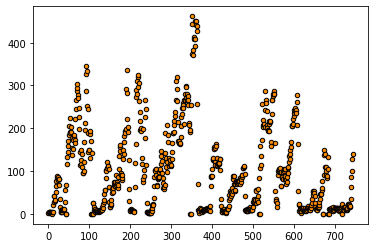

In [176]:
# 数据可视化
import matplotlib.pyplot as plt
X = range(data_all_pm25_filled_array.shape[0])
Y = data_all_pm25_filled_array[:,0]
plt.scatter(X[0:24*31], Y[0:24*31], s=20, edgecolor="black", c="darkorange", label="data")
plt.show()

In [23]:
# 模型定义

DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
ADA_DT = AdaBoostRegressor()
GBDT = GradientBoostingRegressor()

In [26]:
y_pre_train_DT 

array([[ 88. ,  98. ,  92. , ..., 128. , 128. , 120. ],
       [ 12.9,   6.8,  11. , ...,  24.5,  24.4,  26.3],
       [ 21. ,  28. ,  26. , ...,  22. ,  33. ,  24. ],
       ...,
       [ 38. ,  40. ,  42. , ...,  77. ,  79. ,  63. ],
       [ 71.2,  66.3,  56.9, ..., 105.6, 132.4, 101.9],
       [ 50. ,  24. ,  39. , ...,  33. ,   0. ,  59. ]])

In [42]:
# 模型训练

# DT.fit(X_train, y_train)
RF.fit(X_train, y_train)
# ADA_DT.fit(X_train, y_train)
# GBDT.fit(X_train, y_train)

/data2/syh/ENTER/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [43]:
# 评价函数
def Evaluation(label, predict):
    MAE = np.mean(np.abs(label - predict))
    RMSE = np.power(np.mean(np.power(label - predict,2)) ,0.5)
#     MAPE = np.mean(np.abs(label - predict)*np.power(label,-1))
    return MAE,RMSE

In [45]:
# 模型测试

# y_pre_train_DT = DT.predict(X_train)
# y_pre_val_DT = DT.predict(X_val)
y_pre_val_RF = RF.predict(X_val)

In [49]:
# MAE_train_DT, RMSE_train_DT, MAPE_train_DT = Evaluation(y_train, y_pre_train_DT)
# MAE_val_DT, RMSE_val_DT, MAPE_val_DT = Evaluation(y_val, y_pre_val_DT)
MAE, RMSE= Evaluation(y_val, y_pre_val_RF)

print('MAE = '+str(MAE))
print('RMSE = '+str(RMSE))

MAE = 16.52575373993095
RMSE = 29.763598710634938
